In [10]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline

## 1. MNIST

Download the loss data from GCP

In [11]:
!rsync -avz --no-owner --no-group cuongdd@dd2434-vm:~/VAE_project/our_code/experiments/mnist/vamp/log experiments/mnist/vamp/log.json
!rsync -avz --no-owner --no-group cuongdd@dd2434-vm:~/VAE_project/our_code/experiments/mnist/mog/log experiments/mnist/mog/log.json
!rsync -avz --no-owner --no-group cuongdd@dd2434-vm:~/VAE_project/our_code/experiments/mnist/standard/log experiments/mnist/standard/log.json

receiving file list ... done

sent 16 bytes  received 46 bytes  17.71 bytes/sec
total size is 2209556  speedup is 35638.00
receiving file list ... done
log

sent 38 bytes  received 52444 bytes  14994.86 bytes/sec
total size is 122415  speedup is 2.33
receiving file list ... done
log

sent 38 bytes  received 50308 bytes  14384.57 bytes/sec
total size is 118302  speedup is 2.35


**MNIST Vampprior data**

In [14]:
def make_loss_df(dataset='mnist', prior='vamp'):
    with open(f'./experiments/{dataset}/{prior}/log.json', 'r') as f:
        data = json.load(f)
    
    losses = {
        'train_loss': data['trainloss'],
        'train_re': data['trainre'],
        'train_kl': data['trainkl'],
        'test_loss': data['testloss'],
        'test_re': data['testre'],
        'test_kl': data['testkl'],
    }
    
    df = pd.DataFrame(losses)
    
    return df

In [16]:
mnist_vamp_losses = make_loss_df('mnist', 'vamp')
mnist_mog_losses = make_loss_df('mnist', 'mog')
mnist_sg_losses = make_loss_df('mnist', 'standard')

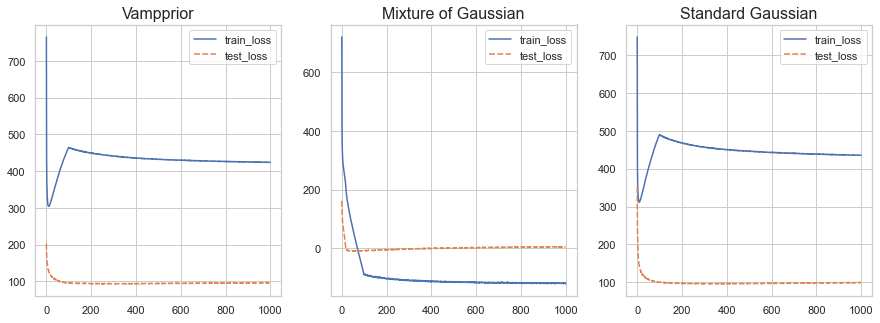

In [36]:
# fig = plt.figure(figsize=(15, 5))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.lineplot(data=mnist_vamp_losses[['train_loss', 'test_loss']], ax=ax1)
ax1.set_title('Vampprior', fontsize=16)

sns.lineplot(data=mnist_mog_losses[['train_loss', 'test_loss']], ax=ax2)
ax2.set_title('Mixture of Gaussian', fontsize=16)

sns.lineplot(data=mnist_sg_losses[['train_loss', 'test_loss']], ax=ax3)
ax3.set_title('Standard Gaussian', fontsize=16)

fig.savefig('./plots/mnist_all_priors_1000.pdf')

losss = -re + beta * kl

### Visualize generated images

We're interested in how the generated images look like after some points during training (100th, 200th, 400th, 600th, 1000th epochs)

Download generated images from GCP

In [49]:
!rsync -avz --no-owner --no-group cuongdd@dd2434-vm:~/VAE_project/our_code/experiments/mnist/vamp/images/epoch1000.png experiments/mnist/vamp_epoch1000.png
!rsync -avz --no-owner --no-group cuongdd@dd2434-vm:~/VAE_project/our_code/experiments/mnist/mog/images/epoch1000.png experiments/mnist/mog_epoch1000.png
!rsync -avz --no-owner --no-group cuongdd@dd2434-vm:~/VAE_project/our_code/experiments/mnist/standard/images/epoch1000.png experiments/mnist/sg_epoch1000.png

receiving file list ... done
epoch1000.png

sent 668 bytes  received 66492 bytes  19188.57 bytes/sec
total size is 72766  speedup is 1.08
receiving file list ... done
epoch1000.png

sent 752 bytes  received 79400 bytes  22900.57 bytes/sec
total size is 85821  speedup is 1.07
receiving file list ... done
epoch1000.png

sent 716 bytes  received 70032 bytes  20213.71 bytes/sec
total size is 75543  speedup is 1.07


![mnist_100](./experiments/mnist/vamp_epoch1000.png)
Vamp

![mnist_100](./experiments/mnist/mog_epoch1000.png)
Mog

![mnist_100](./experiments/mnist/sg_epoch1000.png)
Standard

**TODO:**
- Make a figure which visualize the generated images of three priors on MNIST over different epochs (0, 100, 200, 1000)

**Visualize the pseudo-inputs** on latest model snapshots

In [25]:
!rsync -avz --no-owner --no-group cuongdd@dd2434-vm:~/VAE_project/our_code/experiments/mnist/vamp/models/epoch1000.model experiments/mnist/vamp_epoch1000.model

receiving file list ... done
epoch1000.model

sent 38 bytes  received 6459571 bytes  1435468.67 bytes/sec
total size is 7992897  speedup is 1.24


In [26]:
import torch
import torch.nn as nn

In [31]:
def plot_pseudo_inputs(snapshot_path, image_path, input_size=[1, 28, 28]):
    """Load the snapshot model and produce pseudo-input plots"""
    model = torch.load(snapshot_path)
    plot_pseudos(model, input_size, image_path)

**Plot pseudo-inputs after 1000 epochs**

In [32]:
plot_pseudo_inputs(
    './experiments/mnist/vamp_epoch1000.model',
    './plots/mnist_vamp_pseudo_1000.png',
    input_size=[1, 28, 28]
)

<Figure size 360x360 with 0 Axes>

### RE/KL losses for MoG

Text(0.5, 1.0, 'MoG')

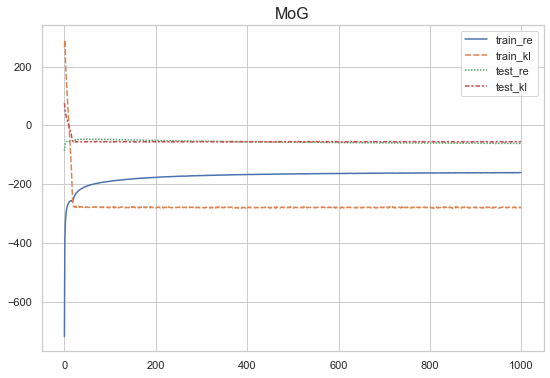

In [37]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.lineplot(data=mnist_mog_losses[['train_re', 'train_kl', 'test_re', 'test_kl']], ax=ax)
ax.set_title('MoG', fontsize=16)

## 2. Freyfaces

Download the loss data from GCP

In [38]:
!rsync -avz --no-owner --no-group cuongdd@dd2434-vm:~/VAE_project/our_code/experiments/freyfaces/vamp/log experiments/freyfaces/vamp/log.json
!rsync -avz --no-owner --no-group cuongdd@dd2434-vm:~/VAE_project/our_code/experiments/freyfaces/mog/log experiments/freyfaces/mog/log.json
!rsync -avz --no-owner --no-group cuongdd@dd2434-vm:~/VAE_project/our_code/experiments/freyfaces/standard/log experiments/freyfaces/standard/log.json

receiving file list ... done

sent 16 bytes  received 46 bytes  17.71 bytes/sec
total size is 1611986  speedup is 25999.77
receiving file list ... done
log

sent 38 bytes  received 45503 bytes  13011.71 bytes/sec
total size is 120038  speedup is 2.64
receiving file list ... done
log

sent 38 bytes  received 43205 bytes  12355.14 bytes/sec
total size is 118182  speedup is 2.73


In [39]:
ff_vamp_losses = make_loss_df('freyfaces', 'vamp')
ff_mog_losses = make_loss_df('freyfaces', 'mog')
ff_sg_losses = make_loss_df('freyfaces', 'standard')

Text(0.5, 1.0, 'Standard Gaussian')

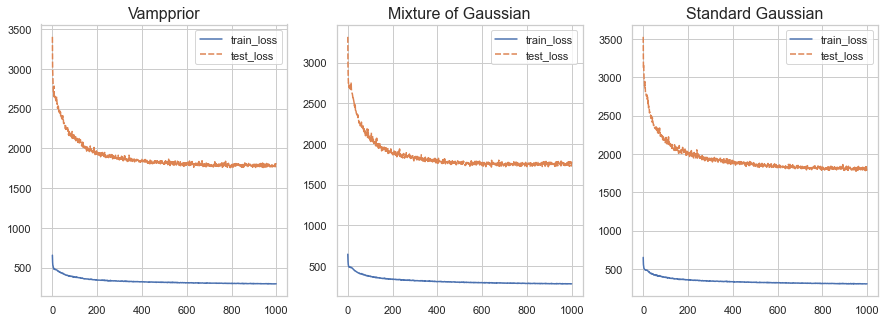

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.lineplot(data=ff_vamp_losses[['train_loss', 'test_loss']], ax=ax1)
ax1.set_title('Vampprior', fontsize=16)

sns.lineplot(data=ff_mog_losses[['train_loss', 'test_loss']], ax=ax2)
ax2.set_title('Mixture of Gaussian', fontsize=16)

sns.lineplot(data=ff_sg_losses[['train_loss', 'test_loss']], ax=ax3)
ax3.set_title('Standard Gaussian', fontsize=16)

# fig.savefig('./plots/mnist_all_priors_1000.pdf')

In [45]:
print('Test loss for last epoch')
print('vampprior', ff_vamp_losses.iloc[999]['test_loss'])
print('mog', ff_mog_losses.iloc[999]['test_loss'])
print('sg', ff_sg_losses.iloc[999]['test_loss'])

Test loss for last epoch
vampprior 1812.474609375
mog 1754.9791259765625
sg 1822.2778930664062


### Visualize generated images

We're interested in how the generated images look like after some points during training (100th, 200th, 400th, 600th, 1000th epochs)

In [50]:
!rsync -avz --no-owner --no-group cuongdd@dd2434-vm:~/VAE_project/our_code/experiments/freyfaces/vamp/images/epoch1000.png experiments/freyfaces/vamp_epoch1000.png
!rsync -avz --no-owner --no-group cuongdd@dd2434-vm:~/VAE_project/our_code/experiments/freyfaces/mog/images/epoch1000.png experiments/freyfaces/mog_epoch1000.png
!rsync -avz --no-owner --no-group cuongdd@dd2434-vm:~/VAE_project/our_code/experiments/freyfaces/standard/images/epoch1000.png experiments/freyfaces/sg_epoch1000.png

receiving file list ... done
epoch1000.png

sent 890 bytes  received 98624 bytes  28432.57 bytes/sec
total size is 101685  speedup is 1.02
receiving file list ... done
epoch1000.png

sent 902 bytes  received 83924 bytes  24236.00 bytes/sec
total size is 86669  speedup is 1.02
receiving file list ... done
epoch1000.png

sent 938 bytes  received 94852 bytes  27368.57 bytes/sec
total size is 97704  speedup is 1.02


![mnist_100](./experiments/freyfaces/vamp_epoch1000.png)
Vamp

![mnist_100](./experiments/freyfaces/mog_epoch1000.png)
Mog

![mnist_100](./experiments/freyfaces/sg_epoch1000.png)
Standard